In [2]:
import mne
from mne.datasets import sample
from mne import io
from mne.preprocessing import create_ecg_epochs, create_eog_epochs
from mne.preprocessing import ICA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import ipywidgets
#from ipywidgets import widgets

Extracting EDF parameters from /home/dcellier/RDSS/AlphaStudy_Data/eegData/eeg_raw/sub15_alpha_study_pilot.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2367999  =      0.000 ...  4624.998 secs...


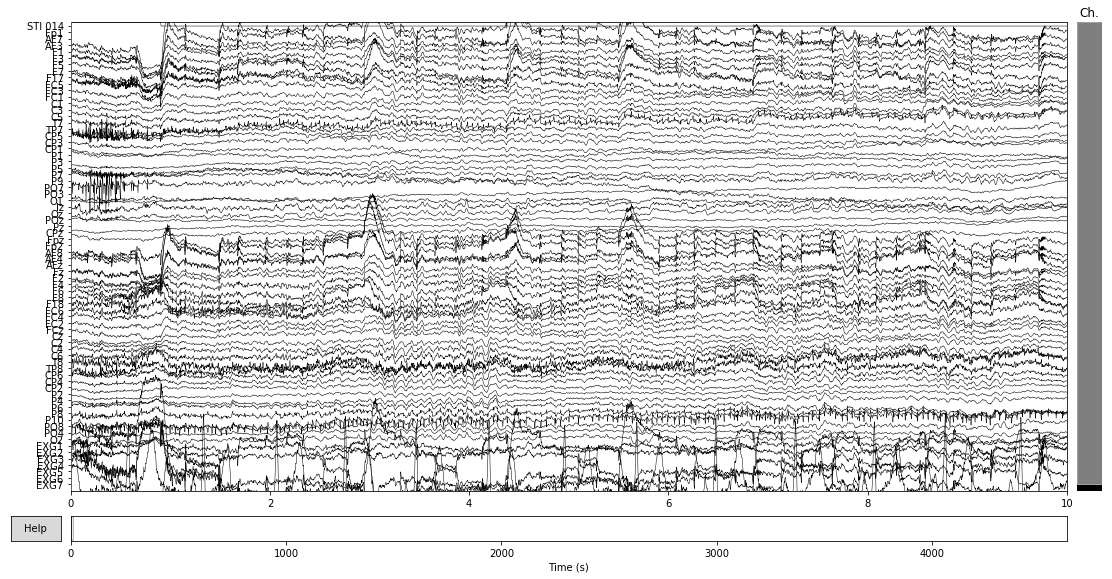

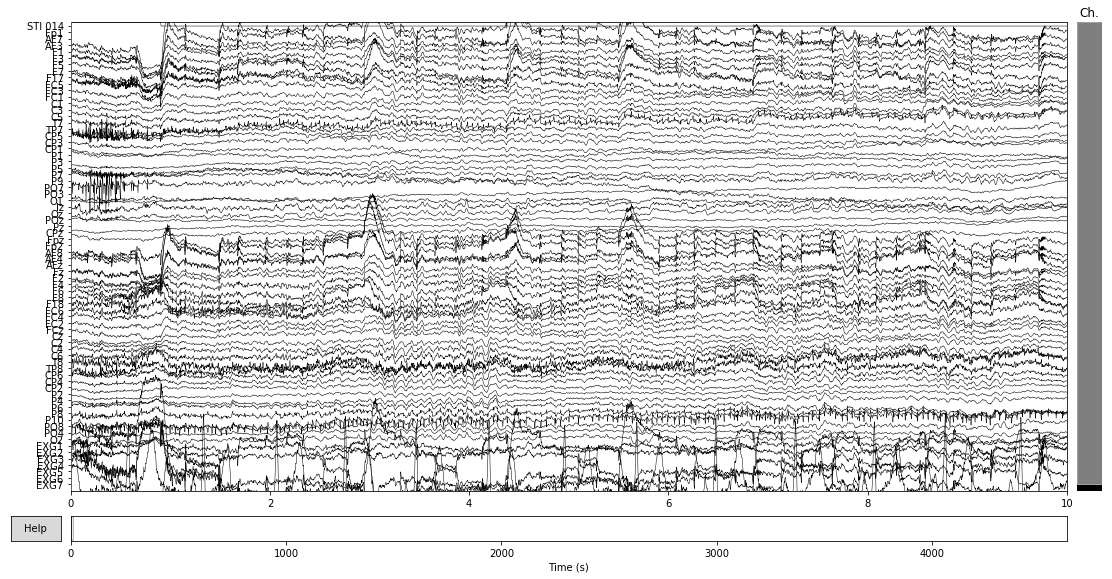

In [3]:
#import kai's test data
ROOT = '/home/dcellier/RDSS/AlphaStudy_Data/eegData/eeg_raw/'
raw_file=ROOT+"sub15_alpha_study_pilot.bdf"
raw=mne.io.read_raw_edf(raw_file,preload=True)
raw.plot(n_channels=72)

# Re-reference, apply high and low pass filters (1 and 50)

Applying a custom EEG reference.
Setting up band-pass filter from 1 - 50 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 12.5 Hz
Filter length of 1691 samples (3.303 sec) selected


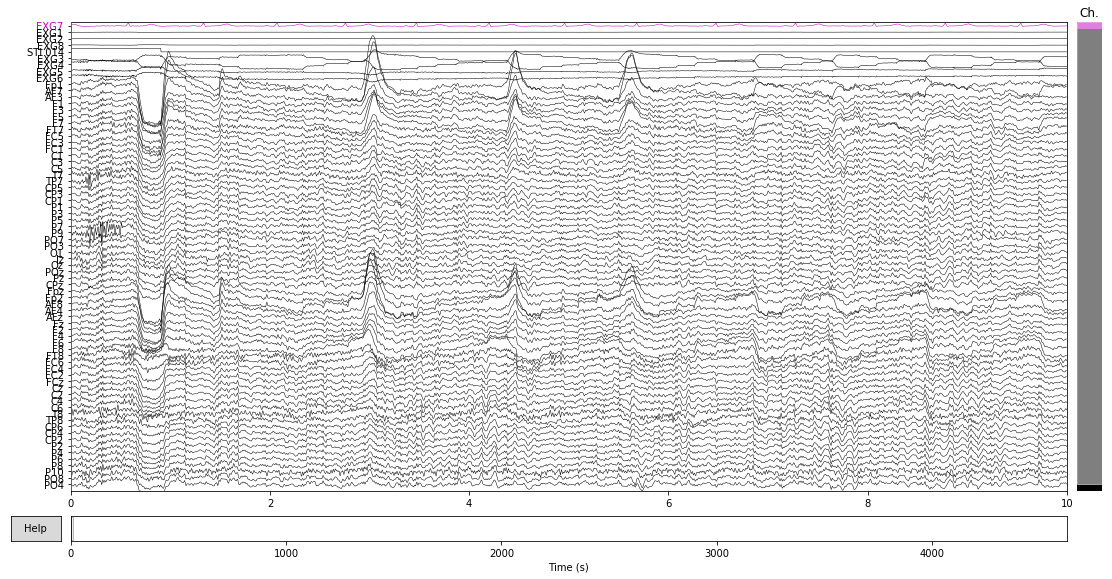

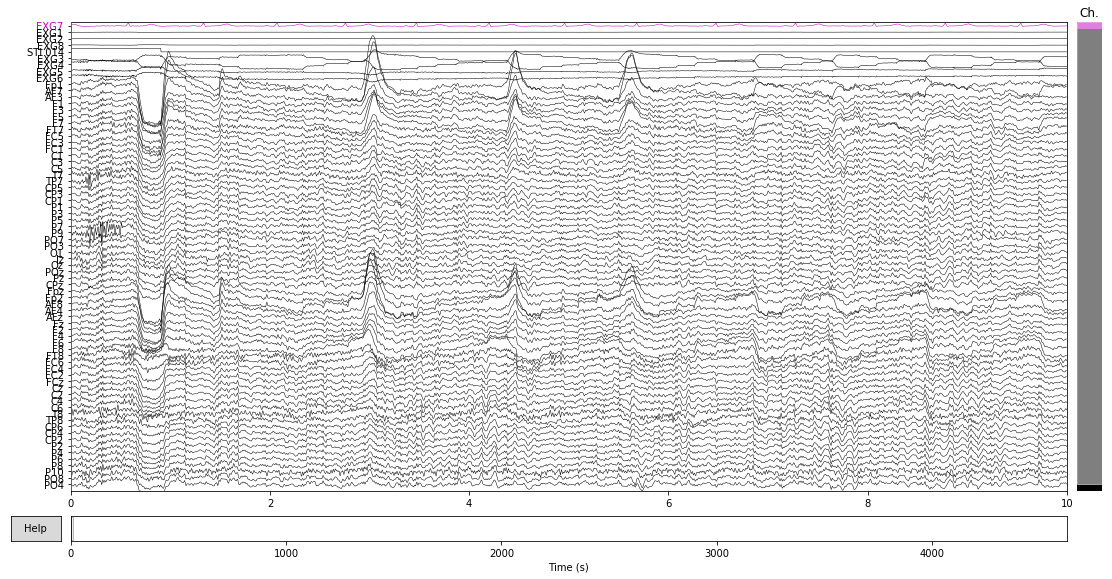

In [4]:
raw_f=raw.copy()
raw_f,r= mne.set_eeg_reference(raw_f,ref_channels=['EXG1', 'EXG2','EXG8'])#mastoids, nose
raw_f.set_channel_types({'EXG1':'emg','EXG2':'emg','EXG3':'eog','EXG4':'eog','EXG5':'eog','EXG6':'eog',
                        'EXG7':'ecg','EXG8':'emg'})
raw_f.filter(1,50)
raw_f.plot(n_channels=72)

In [5]:
#raw_f.info

# Finding Events (triggers)

In [6]:
events = mne.find_events(raw_f, verbose=True)

Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
1992 events found
Event IDs: [  101   103   105   107   109   111   113   115   117 65790]


# Looping through conditions, epoching

In [8]:
event_id = {#'delay1trig':101,'probetrig':103,
            'target5trig':105,'target8trig':107,
            'dis5trig':109,'dis8trig':111}
            #'neutraltrig':113,'ITItrig':115}

tmin, tmax = -0.5, 2  #dont remember the window, making this up
baseline = (None, 0.0) #baseline correction applied with mne.Epochs
epCond={}
for event in event_id.keys():
    thisID={event:event_id[event]}
    epCond[event]=mne.Epochs(raw_f, events=events, event_id=thisID, tmin=tmin,
                    tmax=tmax)

99 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
99 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
99 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
99 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


# Inspect and reject bad epochs, channels (keep eye blinks for ICA)

Loading data for 99 events and 1281 original time points ...
0 bad epochs dropped


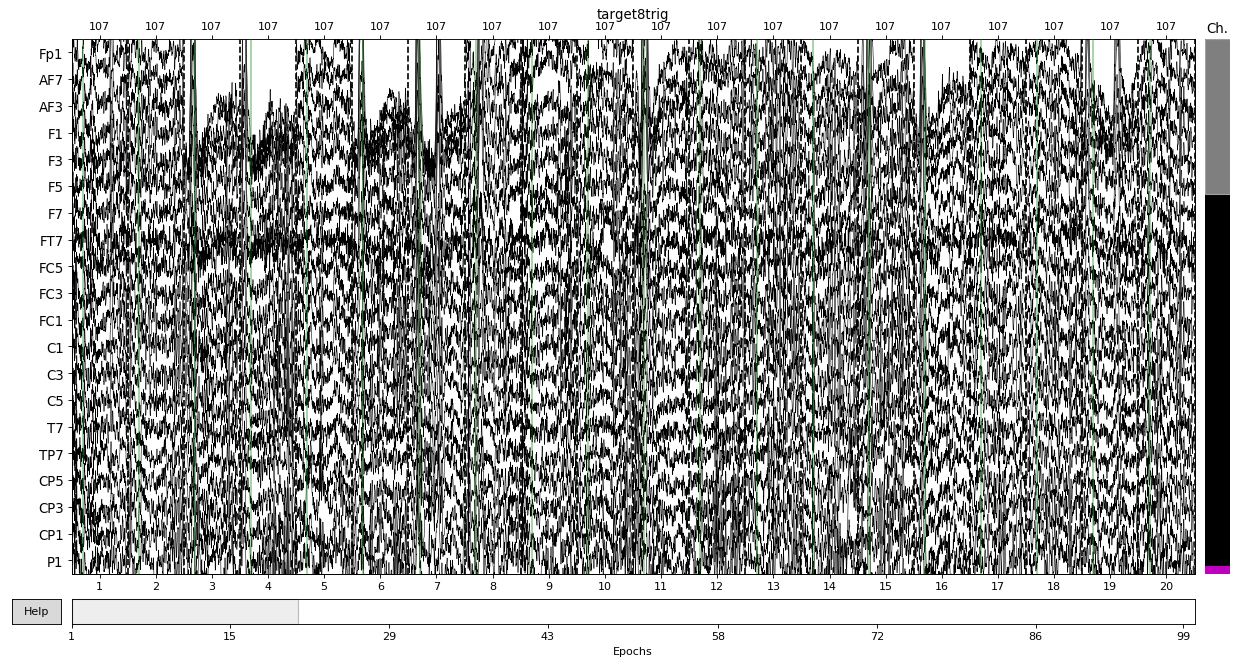

No bad channels to interpolate. Doing nothing...
Loading data for 99 events and 1281 original time points ...
0 bad epochs dropped


<ipython-input-9-02f8a2d245e5>:10: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  thisEp.interpolate_bads()


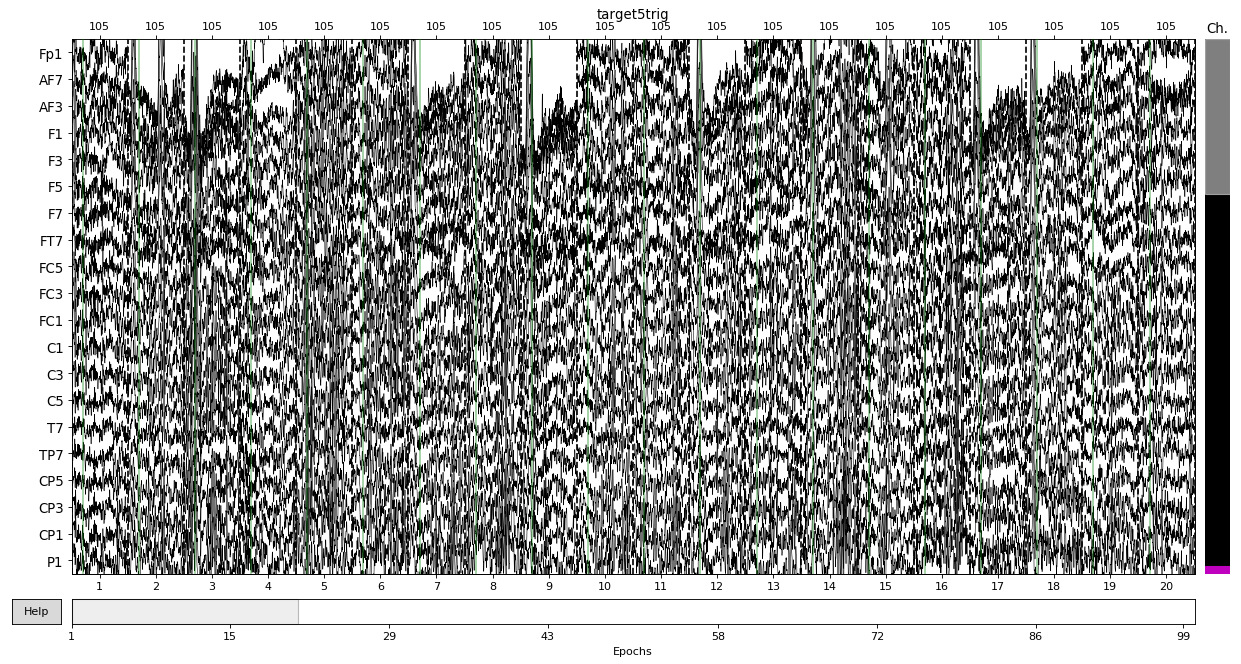

No bad channels to interpolate. Doing nothing...
Loading data for 99 events and 1281 original time points ...
0 bad epochs dropped


<ipython-input-9-02f8a2d245e5>:10: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  thisEp.interpolate_bads()


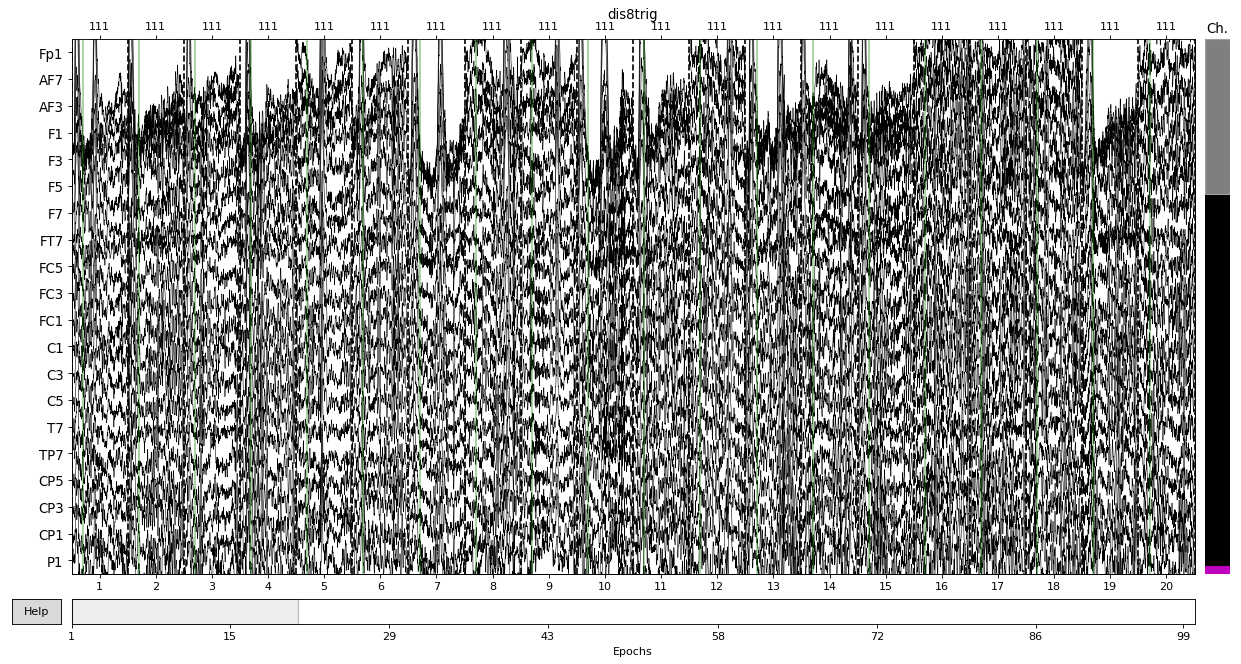

No bad channels to interpolate. Doing nothing...
Loading data for 99 events and 1281 original time points ...
0 bad epochs dropped


<ipython-input-9-02f8a2d245e5>:10: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  thisEp.interpolate_bads()


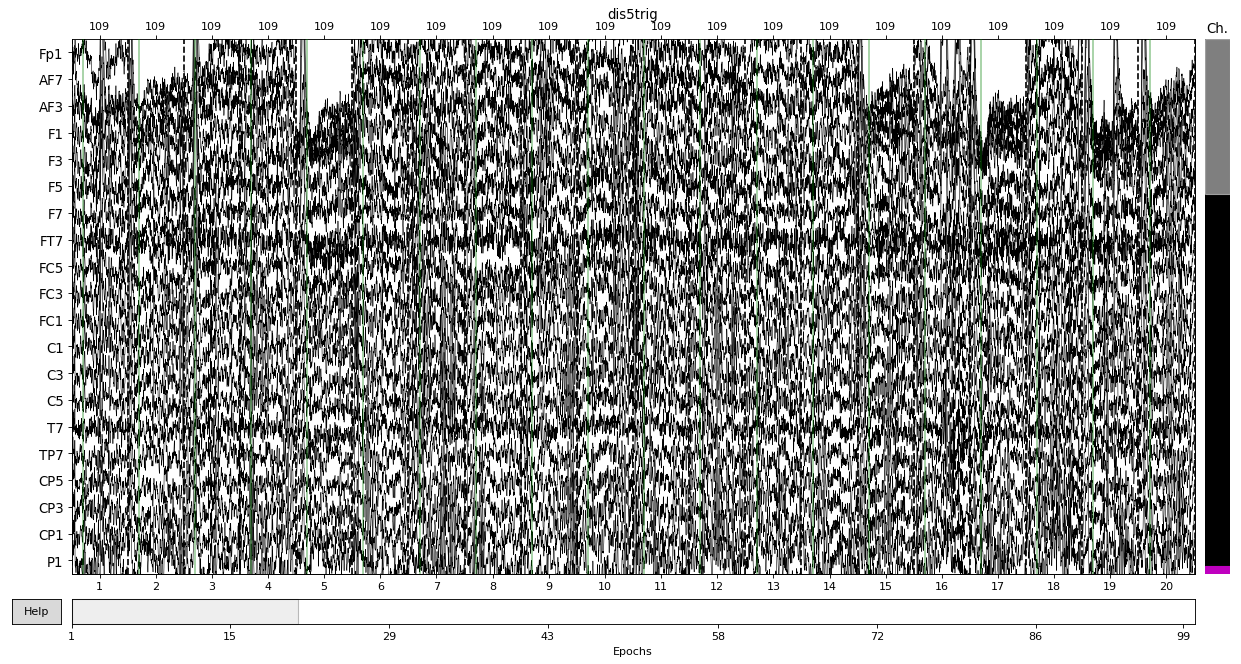

No bad channels to interpolate. Doing nothing...


<ipython-input-9-02f8a2d245e5>:10: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  thisEp.interpolate_bads()


In [9]:
for cond in epCond.keys():
    thisEp=epCond[cond]
    thisEp.load_data()
    thisEp.plot()
    thisEp.drop_bad()
    #thisEp.info['bads']=[]
    # selecting bad electrodes
    bads=[] #select bad electrodes by hand ? 
    thisEp.info['bads']=bads
    thisEp.interpolate_bads()


In [10]:
EOG_channels=['EXG3', 'EXG4', 'EXG5', 'EXG6']
ECG_channels=['EXG7']

# ICA on Epoched data

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selection by number: 25 components
Fitting ICA took 1.4s.
Using channel EXG3 as EOG channel
Using channel EXG4 as EOG channel
Using channel EXG5 as EOG channel
Using channel EXG6 as EOG channel


/data/backed_up/anaconda2/lib/python2.7/site-packages/scipy/signal/signaltools.py:1593: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  h = h[ind]


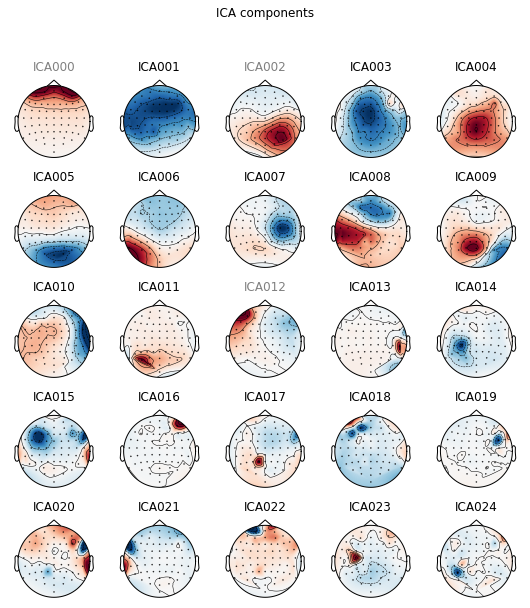

Transforming to ICA space (25 components)
Zeroing out 3 ICA components
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selection by number: 25 components
Fitting ICA took 1.5s.
Using channel EXG3 as EOG channel
Using channel EXG4 as EOG channel
Using channel EXG5 as EOG channel
Using channel EXG6 as EOG channel


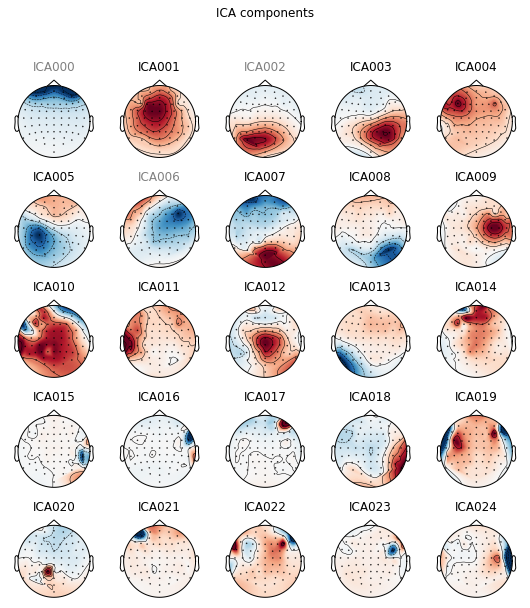

Transforming to ICA space (25 components)
Zeroing out 3 ICA components
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selection by number: 25 components
Fitting ICA took 1.7s.
Using channel EXG3 as EOG channel
Using channel EXG4 as EOG channel
Using channel EXG5 as EOG channel
Using channel EXG6 as EOG channel


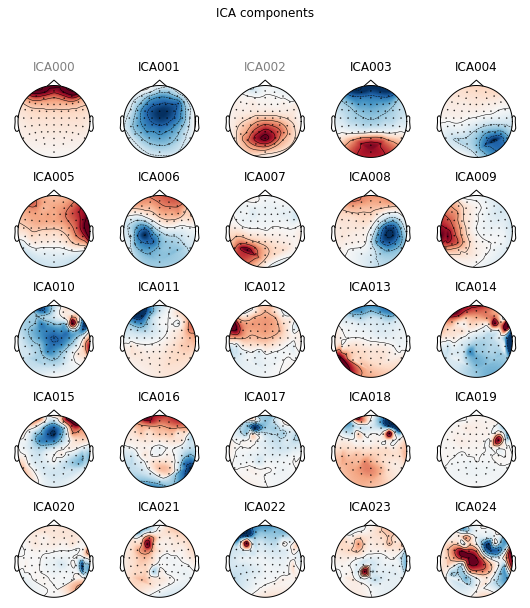

Transforming to ICA space (25 components)
Zeroing out 2 ICA components
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selection by number: 25 components
Fitting ICA took 1.4s.
Using channel EXG3 as EOG channel
Using channel EXG4 as EOG channel
Using channel EXG5 as EOG channel
Using channel EXG6 as EOG channel


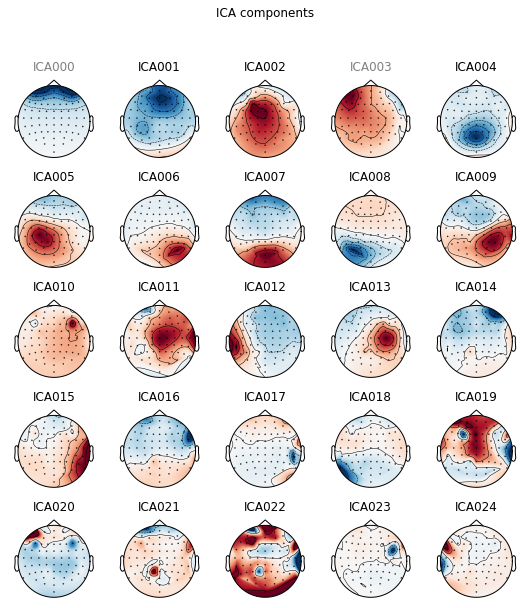

Transforming to ICA space (25 components)
Zeroing out 2 ICA components


In [11]:
our_picks=mne.pick_types(raw_f.info,meg=False,eeg=True,eog=False)#exclude=['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8'])
layout=mne.channels.read_montage('biosemi64')
#raw_f.set_montage(layout)
plottables={}
epAfterICA={}
for cond in epCond.keys():
    thisEp=epCond[cond]  
    thisEp_i=thisEp.copy()
    thisEp_i.load_data()
    thisEp_i.set_montage(layout)
    icaCond=ICA(n_components=25,random_state=25)
    icaCond.fit(thisEp_i,picks=our_picks)
    
    eog_ic=[]
    for ch in EOG_channels:  # find IC's attributable to EOG artifacts
        eog_idx,scores=icaCond.find_bads_eog(thisEp,ch_name=ch)
        eog_ic.append(eog_idx)
    ecg_ic=[]
    for ch in ECG_channels: # find IC's attributable to ECG artifacts
        ecg_idx,scores=icaCond.find_bads_ecg(thisEp,ch_name=ch)
        ecg_ic.append(ecg_idx)
    reject_ic=[]
    for eog_inds in eog_ic:
        for ele in eog_inds:
            if ele not in reject_ic:
                reject_ic.append(ele)
    for ecg_inds in ecg_ic:
        for ele in ecg_inds:
            if ele not in reject_ic:
                reject_ic.append(ele) #add these IC indices to the list of IC's to reject
    
    icaCond.exclude=[]
    icaCond.exclude.extend(reject_ic)
    icaCond.plot_components(picks=range(25),ch_type='eeg',inst=thisEp) 
    bad_ics=[] #list those identified by visual inspection
    icaCond.exclude.extend(bad_ics)
    icaCond.apply(thisEp_i)
    plottables[cond]=icaCond
    epAfterICA[cond]=thisEp_i
    
def plot_diff(epoch,ica):
    return ica.plot_overlay(epoch.average(),exclude=ica.exclude)

Transforming to ICA space (25 components)
Zeroing out 3 ICA components


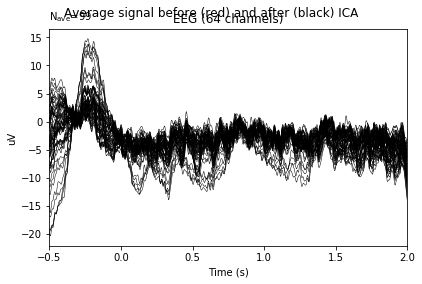

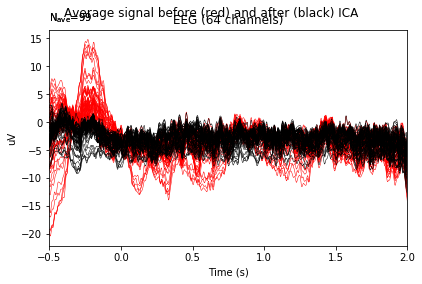

In [12]:
# plotting before (RED) and after (BLACK) removal of IC's for that epoch 
plot_diff(epCond['target5trig'],plottables['target5trig'])